<a href="https://colab.research.google.com/github/mdefilippi85/P-Project-Big-Data/blob/master/example%20geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [6]:
!pip install simpledbf 
!pip install geopandas
!pip install PyDrive

  Created wheel for simpledbf: filename=simpledbf-0.2.6-cp36-none-any.whl size=13793 sha256=498f284bdfe4412e909719f1efce3e8bc33d552b83aa769083ac58871e78662c
  Stored in directory: /root/.cache/pip/wheels/72/dd/df/cdfb970a508ef9750ebb4b6e035a3410c3d62b5a6a91d2aafc
Successfully built simpledbf
     |████████████████████████████████| 962kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 301kB/s 
     |████████████████████████████████| 10.9MB 20.4MB/s 


In [ ]:
from simpledbf import Dbf5

In [7]:
import geopandas as gpd

In [ ]:
!pip install contextily


# a) authorize Google SDK to access Google Drive from Colab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# b) Uploading files from your local file system

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sentinel_asc_mosul_PS_85_0.dbf to sentinel_asc_mosul_PS_85_0.dbf
Saving sentinel_asc_mosul_PS_85_0.prj to sentinel_asc_mosul_PS_85_0.prj
Saving sentinel_asc_mosul_PS_85_0.shp to sentinel_asc_mosul_PS_85_0.shp
Saving sentinel_asc_mosul_PS_85_0.shx to sentinel_asc_mosul_PS_85_0.shx
User uploaded file "sentinel_asc_mosul_PS_85_0.dbf" with length 14617387 bytes
User uploaded file "sentinel_asc_mosul_PS_85_0.prj" with length 145 bytes
User uploaded file "sentinel_asc_mosul_PS_85_0.shp" with length 387820 bytes
User uploaded file "sentinel_asc_mosul_PS_85_0.shx" with length 86260 bytes


In [8]:
df_regioni = gpd.read_file(filename="/content/sentinel_asc_mosul_PS_85_0.shp")
df_regioni.head()

,velocity,coherence,MuSigma,Hprecision,Vprecision,range,azimuth,SubArea ID,Lon,Lat,xpos,ypos,zpos,Z,ALOS,ILOS,Hcorrectio,Tot_D[mm],D_20141015,D_20141027,D_20141108,D_20141202,D_20141214,D_20141226,D_20150107,D_20150119,D_20150131,D_20150212,D_20150224,D_20150308,D_20150320,D_20150401,D_20150413,D_20150425,D_20150507,D_20150531,D_20150612,D_20150624,D_20150706,D_20150718,D_20150730,D_20150811,D_20150823,D_20150916,D_20150928,D_20151022,D_20151103,D_20151115,D_20151209,D_20160126,D_20160219,D_20160314,D_20160407,D_20160501,D_20160525,D_20160606,D_20160630,D_20160712,D_20160724,D_20160805,D_20160817,D_20160829,D_20160910,D_20160922,D_20161004,D_20161016,D_20161028,D_20161109,D_20161121,D_20161203,D_20161215,D_20161227,D_20170108,D_20170120,D_20170201,D_20170213,D_20170225,geometry
0,-0.683855,0.861967,3.237587,3.971560,0.429583,1631,18,0,42.833013,36.600664,42.833013,36.600664,281.778380,265.405377,81.398294,41.055556,-12.205662,-41.959978,0.0,2.542219,2.469371,1.841544,-1.177726,-0.871206,-1.143952,1.028115,-2.084957,-0.032310,1.603547,5.696953,-1.081475,1.099821,-2.126879,2.603712,-3.597718,-0.995743,-0.768214,-1.063103,-0.309631,1.130883,-1.041071,-2.035698,-2.699980,-1.813469,-0.191180,-2.114801,-2.107901,-5.089733,-0.565688,-10.132752,-0.284837,2.750061,2.391182,4.799787,2.115172,1.847058,1.378582,-0.318395,0.521403,-0.590801,-0.890638,-0.927028,-2.063726,-3.690272,-2.317567,-1.540333,-2.334099,-0.803890,-2.966369,-0.743610,-2.153591,-1.794513,-3.195386,-0.099657,-1.870003,-2.899678,-3.249806,POINT Z (42.83301 36.60066 265.40538)
1,-3.527725,0.855305,3.020220,4.073971,0.440661,1453,28,0,42.829245,36.601414,42.829245,36.601414,279.991570,263.618395,81.398456,41.037271,-7.969189,-561.900545,0.0,-2.483039,-5.851436,-7.173506,-8.133985,-6.946681,-5.549110,-7.664122,-7.548261,-6.131078,-7.958863,-4.307773,-9.090508,-5.294700,4.971467,-9.644953,-7.371883,-8.407228,-8.949782,-8.122551,-8.116821,-8.184880,-8.453605,-6.791393,-7.028053,-7.947655,-6.331824,-11.219917,-11.687670,-11.860753,-9.748531,-9.037271,-11.852163,-11.470456,-14.527432,-8.345607,-6.095767,-8.542693,-9.891392,-12.176693,-12.061062,-10.910150,-12.301304,-11.311197,-10.696202,-12.117296,-12.047229,-11.205442,-12.916066,-11.754932,-11.380400,-14.303791,-16.443920,-13.648037,-17.866360,-13.683127,-15.112616,-15.489812,-15.683035,POINT Z (42.82925 36.60141 263.61840)
2,0.091787,0.869824,2.940762,3.848308,0.416252,1301,38,0,42.826031,36.602240,42.826031,36.602240,281.873373,265.499209,81.398632,41.022008,-5.279705,-20.918271,0.0,-2.502035,-0.245606,0.219009,-1.177942,0.238241,1.533696,-3.364846,0.048762,5.345229,-0.807352,-4.620144,-0.034574,-4.877902,-3.263100,-3.940178,-2.449218,-0.965296,-3.150687,1.684435,-0.367400,3.123494,-0.715236,4.048605,0.529757,0.046679,1.894161,-1.953031,-0.348381,0.612669,0.128088,1.576570,3.775479,-0.594483,1.658515,-0.197729,1.713607,2.469060,-1.037287,1.383538,-1.185821,-0.937611,-2.400623,-1.039186,-0.699283,-2.411353,0.022718,1.463973,-0.863480,1.340869,-0.470070,0.345734,1.795314,-1.199479,-5.013197,-0.403488,-0.622315,-3.072232,-0.985908,POINT Z (42.82603 36.60224 265.49921)
3,-0.584627,0.881766,2.822001,3.655627,0.395410,1226,40,0,42.824477,36.602279,42.824477,36.602279,279.116163,262.743048,81.398646,41.014083,-6.787193,13.206817,0.0,2.189257,-0.360765,-0.603275,-0.839397,0.992899,1.427766,1.053613,0.726652,-0.506024,3.391125,2.392959,-0.042567,-0.066047,0.002772,3.357917,0.820958,0.338847,1.134912,0.123588,0.468857,2.295399,0.233003,1.646035,0.636856,-1.478161,-1.808331,-1.906383,-1.314599,-0.685311,-0.040248,6.012908,-8.027988,7.449873,2.074867,-0.586724,1.639596,-0.336770,1.311888,-0.105647,-1.461442,-0.800809,-0.549863,-1.243370,-1.422080,-0.768059,-1.994188,-0.885546,-1.326703,-1.579724,0.352844,-0.265391,-0.438521,2.034341,-1.997831,-0.430541,3.638647,-0.271077,-0.398184,POINT Z (42.82448 36.60228 262.74305)
4,-0.289169,0.865046,2.810524,3.923583,0.424394,1251,40,0,42.825077,36.602362,42.825077,36.602362,287.932501,271.558562

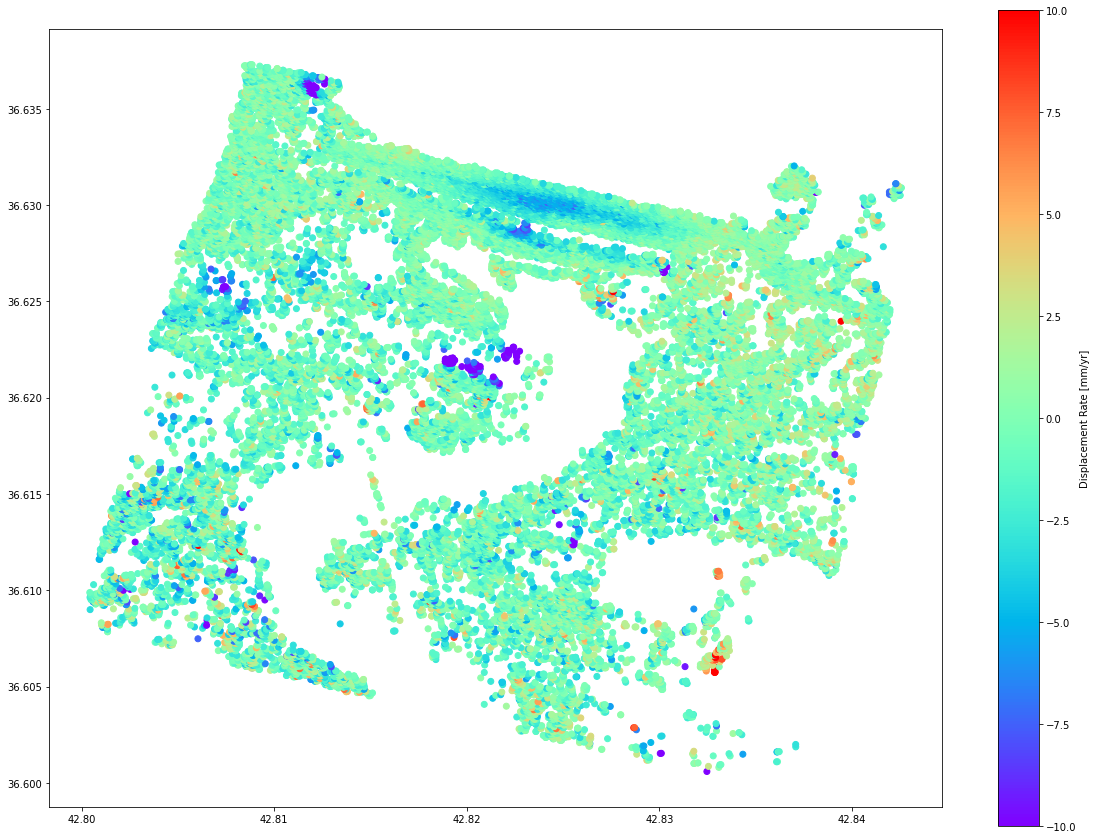

In [ ]:

import contextily as ctx

text = 'Displacement rate [mm/yr]' #@param {type:"string"}
dropdown = 'velocity' #@param ["velocity", "coherence", "MuSigma"]
cmap = 'rainbow' #@param ["rainbow", "greys"]
lower_limit = -10.0 #@param {type:"number"} 
upper_limit = 10.0 #@param {type:"number"} 


df_regioni.plot(column=dropdown, figsize=(20,15), cmap='rainbow', legend=True, legend_kwds={"label":"Displacement Rate [mm/yr]"}, vmin=lower_limit, vmax=upper_limit)


# PLOTLY EXPRESS

In [9]:
import plotly.graph_objects as go

In [ ]:
_text = df_regioni['Lat'].astype(str) + '' + df_regioni['Lon'].astype(str) + ', ' + df_regioni['coherence'].astype(str) + '' + 'Velocity: ' + df_regioni['velocity'].astype(str)
d={'lat':df_regioni['Lat'].values[0], 'lon':df_regioni['Lon'].values[0]}

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_regioni['Lon'],
        lat = df_regioni['Lat'],
        text = _text,
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = -10.0,
            color = df_regioni['velocity'],
            cmax = 10.0,
            colorbar_title="Displacement Rate<br>mm/year"
        )))

fig.update_layout(
        title = 'Mosul Dike',
        geo = dict(
            scope='asia',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1.5,
            subunitwidth = 1.5
        ),
    )
fig.show()

In [59]:
import plotly.express as px



_text = df_regioni['Lat'].astype(str) + '' + df_regioni['Lon'].astype(str) + ', ' + df_regioni['coherence'].astype(str) + '' + 'Velocity: ' + df_regioni['velocity'].astype(str)
d={'lat':df_regioni['Lat'].values[0], 'lon':df_regioni['Lon'].values[0]}

fig = px.scatter_mapbox(df_regioni, lat='Lat', lon='Lon', hover_data=["velocity", "coherence"],  zoom=10, height=600,  color="velocity", color_continuous_scale = 'rainbow', range_color= [-10,10]) 
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

# Example with Dash

In [ ]:
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

In [64]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

In [77]:
available_indicators = df_regioni['Lat'].unique()
app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Fertility rate, total (births per woman)'
            ),
            dcc.RadioItems(
                id='crossfilter-xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-year--slider',
        min=df_regioni['velocity'].min(),
        max=df_regioni['velocity'].max(),
        value=df_regioni['velocity'].max(),
        marks={str(year): str(year) for year in df_regioni['velocity'].unique()},
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])

In [78]:
@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    df_regioni = df_regioni[df_regioni['velocity'] == year_value]

    fig = px.scatter(x=dff[dff['Lat'] == xaxis_column_name]['Value'],
            y=dff[dff['Lat'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Lat'] == yaxis_column_name]['velocity']
            )

    fig.update_traces(customdata=dff[dff['Lat'] == yaxis_column_name]['velocity'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig

In [79]:
def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       bgcolor='rgba(255, 255, 255, 0.5)', text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig

In [80]:
@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df_regioni[df_regioni['velocity'] == country_name]
    dff = dff[dff['Lat'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)

In [81]:
@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df_regioni['velocity'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Lat'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)

In [84]:

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored

In [96]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')

available_indicators = df['Indicator Name'].unique()

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Fertility rate, total (births per woman)'
            ),
            dcc.RadioItems(
                id='crossfilter-xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-year--slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
            )

    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       bgcolor='rgba(255, 255, 255, 0.5)', text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


if __name__ == '__main__':
    app.run_server(port=443, host='127.0.0.1', debug=True)

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

Dash is running on http://127.0.0.1:443/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in productio

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [93]:
server

<Flask '__main__'>